In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
# --- Parameters ---
L = 1.0         # Longitud de la cuerda/círculo
c = 1.0         # Velocidad de la onda
T = 20.0       # Duración de la simulación
dx = 0.01       # Paso espacial
dt = 0.005      # Paso temporal
N = int(L/dx)   # Número de puntos espaciales
M = int(T/dt)   # Número de puntos temporales


In [5]:
# --- Funciones ---
def gaussian_pulse(x, A, x_0, sigma):
    """Genera un pulso Gaussiano."""
    return A * np.exp(-0.5 * ((x - x_0) / sigma) ** 2)

def f(n, x):
    """Función para condiciones iniciales basadas en senos."""
    return np.sin(n * x)


In [6]:
# --- Configuración de la simulación ---
theta = np.linspace(0, 2 * np.pi, N)  # Coordenada angular (para el círculo)
gamma = c * dt / dx                   # Factor de Courant-Friedrichs-Lewy

u = np.zeros((M,N)) # Create a 2D array to store the solution

In [8]:
# --- Set the boundary conditions
u[:,0] = 0  #all time, first point is a node 
u[:,-1] = 0 #all time, last point is a node

In [59]:
def modes(angulo):
    pto = int(5*angulo/18)
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    fig.suptitle("Análisis de frecuencias de la taza", fontsize=20)
    
      
    for idx, i in enumerate([0, 60, 120, 180, 240, 300]):
        
        # --- Initial spatial configuration.
        theta_pulse = i * np.pi/180
        u[0,:] = gaussian_pulse(theta, 0.4, theta_pulse, 0.2) 
        u[1, :] = gaussian_pulse(theta, 0.4, theta_pulse, 0.2)
        
        # --- Set the boundary conditions
        u[:,0] = 0  #all time, first point is a node 
        u[:,-1] = 0 #all time, last point is a node
        
                # --- Esquema de diferencias finitas ---
        for m in range(1, M - 1):
            for n in range(1, N - 1):
                u[m + 1, n] = (gamma**2 * (u[m, n + 1] + u[m, n - 1]) + 2 * (1 - gamma**2) * u[m, n] - u[m - 1, n])

        
        fft_result = np.fft.fft(u[:,pto])
        fft_freq = np.fft.fftfreq(M, dt)

        magnitude = np.abs(fft_result)

        # Filtrar frecuencias negativas
        positive_freqs = fft_freq > 0
        fft_freq = fft_freq[positive_freqs]
        magnitude = magnitude[positive_freqs]

        #Identificar la frecuencia dominante
        dominant_freq = fft_freq[np.argmax(magnitude)]

        print(f"La frecuencia dominante es: {dominant_freq} Hz")
        
        

        row = idx // 2
        col = idx % 2
        
        axs[row, col].plot(fft_freq, magnitude)
        axs[row, col].set_title(f"θ = {i}°",fontsize=12)
        axs[row, col].set_xlabel("Frecuencia [Hz]",fontsize=12)
        axs[row, col].set_ylabel("Magnitud",fontsize=12)
        axs[row, col].set_xscale('log')  
        axs[row, col].grid(True)
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

La frecuencia dominante es: 8.5 Hz
La frecuencia dominante es: 1.5 Hz
La frecuencia dominante es: 0.5 Hz
La frecuencia dominante es: 0.5 Hz
La frecuencia dominante es: 0.5 Hz
La frecuencia dominante es: 1.5 Hz


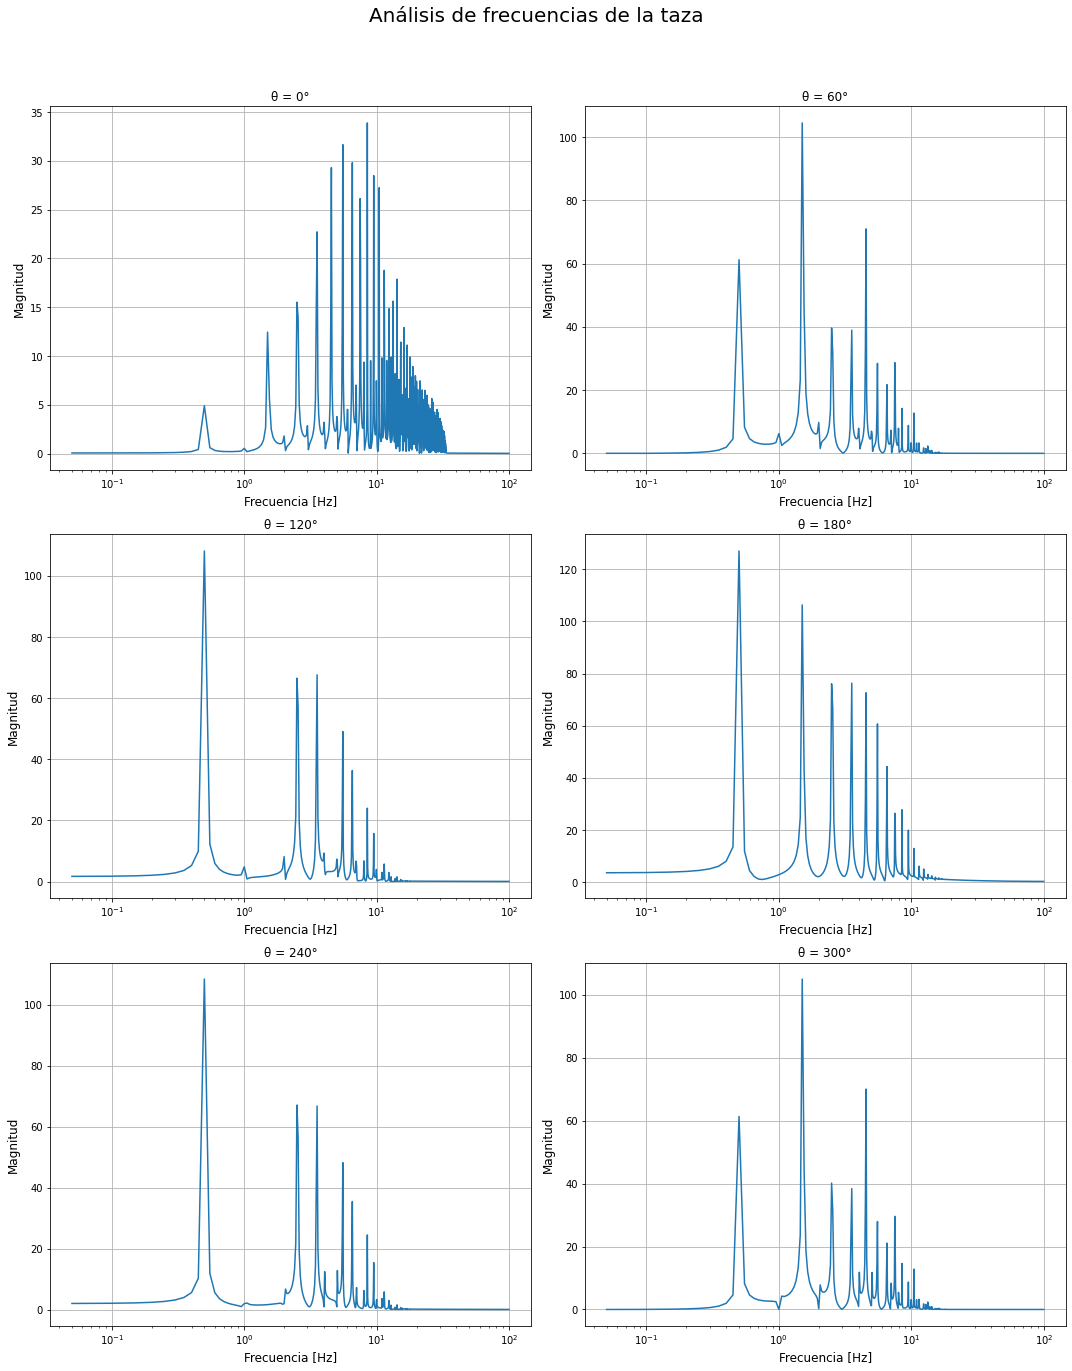

In [60]:
modes(180)